# This program does the visualization and save the figures.

## Use the separately csv files of the county to manipulate the data.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
county = "Kaohsiung_City"
path = f"../data/processed/{county}.csv"

try:
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
except FileNotFoundError:
    print("Can't find the county name.")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888497 entries, 0 to 888496
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       888484 non-null  datetime64[ns]
 1   sitename   888497 non-null  object        
 2   county     888497 non-null  object        
 3   aqi        882989 non-null  float64       
 4   pollutant  554629 non-null  object        
 5   status     853552 non-null  object        
 6   so2        870275 non-null  float64       
 7   co         874788 non-null  float64       
 8   o3         871187 non-null  float64       
 9   o3_8hr     879876 non-null  float64       
 10  pm10       868137 non-null  float64       
 11  pm2.5      857698 non-null  float64       
 12  no2        864147 non-null  float64       
 13  nox        863634 non-null  float64       
 14  no         863630 non-null  float64       
 15  windspeed  876380 non-null  float64       
 16  winddirec  875981 no

In [4]:
# Check all of sitename
df["sitename"].unique()

array(['Fuxing', 'Kaohsiung (Hunei)', 'Zuoying', 'Meinong', 'Qiaotou',
       'Renwu', 'Fengshan', 'Daliao', 'Linyuan', 'Nanzi', 'Qianjin',
       'Xiaogang', 'Qianzhen', 'Kaohsiung (Linyuan)', 'Hunei',
       'Kaohsiung (Alian)', 'Kaohsiung (Nanzi)', 'Kaohsiung (Zuoying)',
       'Nanzi Export Processing Zone'], dtype=object)

In [5]:
# We don't need the county name, drop it off.
df = df.drop(columns="county")

In [6]:
# Let's check the NaN first
df.isna().sum()

date             13
sitename          0
aqi            5508
pollutant    333868
status        34945
so2           18222
co            13709
o3            17310
o3_8hr         8621
pm10          20360
pm2.5         30799
no2           24350
nox           24863
no            24867
windspeed     12117
winddirec     12516
co_8hr         5695
pm2.5_avg      9986
pm10_avg      12261
so2_avg       95726
siteid       276055
dtype: int64

In [7]:
# We can make a copy avoiding changing the original data.
df_copy = df.copy()

In [8]:
# Set the time period and sitename
start_time = "2024-08-01"
end_time = "2024-08-31"
sitename = "Zuoying"

# Catch the data in the time period and matching sitename
df_plot = df_copy[(df_copy["date"] > start_time) & (df_copy["date"] < end_time)]
df_plot = df_plot[
    df_plot["sitename"] == sitename
    ]

# create a day column to save the day
df_plot["day"] = df_plot["date"].dt.date
df_plot["month"] = df_plot["date"].dt.month
df_plot["year"] = df_plot["date"].dt.year
df_plot

,date,sitename,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg,siteid,day,month,year
321,2024-08-30 23:00:00,Zuoying,28.0,NaN,Good,1.4,0.09,21.3,30.7,10.0,...,0.9,261.0,0.1,3.7,10.0,1.0,54.0,2024-08-30,8,2024
334,2024-08-30 22:00:00,Zuoying,32.0,NaN,Good,1.5,0.10,21.4,35.3,5.0,...,0.7,314.0,0.1,4.7,10.0,1.0,54.0,2024-08-30,8,2024
340,2024-08-30 21:00:00,Zuoying,37.0,NaN,Good,1.3,0.09,22.4,40.5,7.0,...,1.1,238.0,0.1,4.6,12.0,1.0,54.0,2024-08-30,8,2024
358,2024-08-30 20:00:00,Zuoying,42.0,NaN,Good,1.2,0.11,24.8,45.2,9.0,...,1.4,246.0,0.1,4.9,13.0,1.0,54.0,2024-08-30,8,2024
375,2024-08-30 19:00:00,Zuoying,44.0,NaN,Good,1.2,0.13,34.9,48.9,11.0,...,1.6,228.0,0.1,5.1,13.0,1.0,54.0,2024-08-30,8,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9604,2024-08-01 05:00:00,Zuoying,11.0,NaN,Good,0.2,0.12,14.7,9.2,8.0,...,0.2,16.0,0.2,3.3,11.0,1.0,54.0,2024-08-01,8,2024
9616,2024-08-01 04:00:00,Zuoying,12.0,NaN,Good,0.2,0.16,8.9,8.3,13.0,...,0.3,111.0,0.2,3.8,12.0,1.0,54.0,2024-08-01,8,2024
9629,2024-08-01 03:00:00,Zuoying,13.0,NaN,Good,0.4,0.16,10.5,9.1,11.0,...,0.3,87.0,0.2,4.1,12.0,1.0,54.0,2024-08-01,8,2024
9635,2024-08-01 02:00:00,Zuoying,15.0,NaN,Good,0.4,0.21,6.0,10.4,15.0,...,0.5,54.0,0.2,4.4,12.0,1.0,54.0,2024-08-01,8,2024


# Draw the date data.

In [1]:
# Ascending the data via day
df_plot = df_plot.sort_values(by="day", ascending=True)

# Build the color corresponding to the aqi
y_label = "aqi"
df_mean = df_plot.groupby("day", as_index=False)[y_label].mean()

# Normalize will standardize the column value between 0 to 1
norm = plt.Normalize(df_mean[y_label].min(), df_mean[y_label].max())

# as_cmap makes the sns palette to colormap
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(df_mean[y_label]))

# Draw the Boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df_plot,
    x="day",
    y=y_label,
    # dict create a "day" -> color form
    palette=dict(zip(df_mean["day"], colors)),
    hue="day",
    legend=False,
)
plt.xticks(rotation=90)
plt.xlabel("DAY", fontsize=14)
plt.ylabel("AQI(Air Quality Index)", fontsize=14)
plt.ylim((0, 100))
plt.yticks(np.arange(0, 100, 5))
plt.title(f"AQI Distribution by Day in Taoyuan District ({start_time} - {end_time})", fontsize=18)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# Save figure
path = f"../figure/{county}_{sitename}_{y_label}_{start_time}_day.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")
print("Figure has been saved.")

# show method must stand at the last position
plt.show()

NameError: name 'df_plot' is not defined

# Draw the month data.

Figure has been saved.


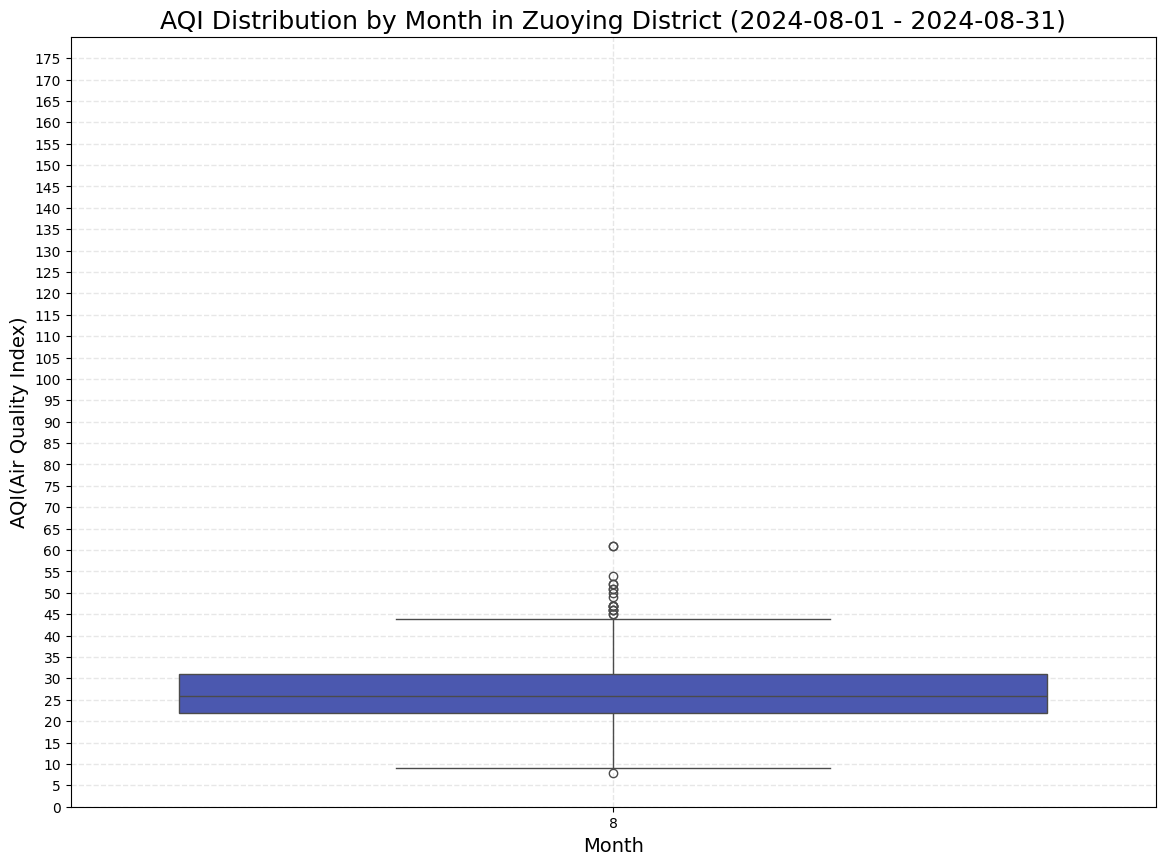

In [9]:
# Ascending the data via day
df_plot = df_plot.sort_values(by="month", ascending=True)

# Build the color corresponding to the aqi
y_label = "aqi"
df_mean = df_plot.groupby("month", as_index=False)[y_label].mean()

# Normalize will standardize the column value between 0 to 1
norm = plt.Normalize(df_mean[y_label].min(), df_mean[y_label].max())

# as_cmap makes the sns palette to colormap
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(df_mean[y_label]))

# Draw the Boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df_plot,
    x="month",
    y=y_label,
    # dict create a "day" -> color form
    palette=dict(zip(df_mean["month"], colors)),
    hue="month",
    legend=False,
)
plt.xticks()
plt.xlabel("Month", fontsize=14)
plt.ylabel("AQI(Air Quality Index)", fontsize=14)
plt.ylim((0, 180))
plt.yticks(np.arange(0, 180, 5))
plt.title(f"AQI Distribution by Month in Zuoying District ({start_time} - {end_time})", fontsize=18)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# Save figure
path = f"../figure/{county}_{sitename}_{y_label}_{start_time}_month.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")
print("Figure has been saved.")

# show method must stand at the last position
plt.show()

# Draw the year data.

Figure has been saved.


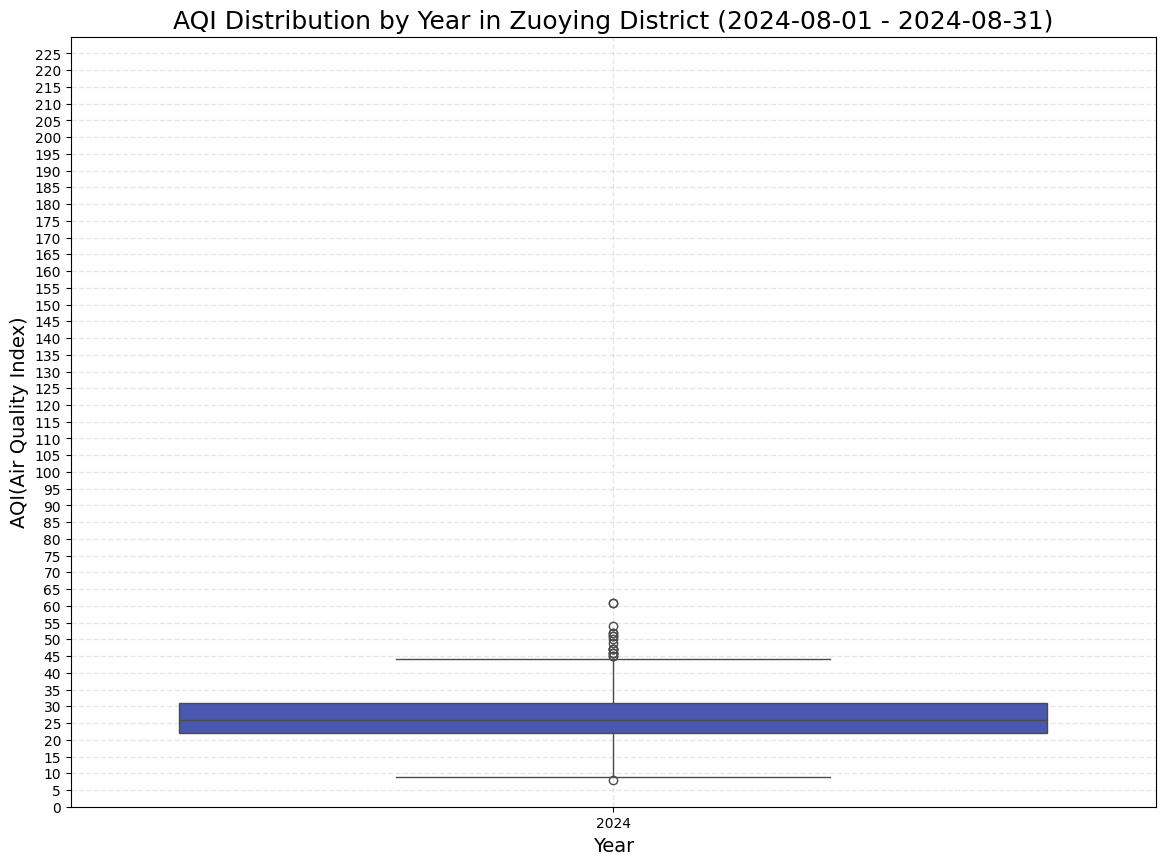

In [10]:
# Ascending the data via day
df_plot = df_plot.sort_values(by="year", ascending=True)

# Build the color corresponding to the aqi
y_label = "aqi"
df_mean = df_plot.groupby("year", as_index=False)[y_label].mean()

# Normalize will standardize the column value between 0 to 1
norm = plt.Normalize(df_mean[y_label].min(), df_mean[y_label].max())

# as_cmap makes the sns palette to colormap
colors = sns.color_palette("coolwarm", as_cmap=True)(norm(df_mean[y_label]))

# Draw the Boxplot
plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df_plot,
    x="year",
    y=y_label,
    # dict create a "day" -> color form
    palette=dict(zip(df_mean["year"], colors)),
    hue="year",
    legend=False,
)
plt.xticks()
plt.xlabel("Year", fontsize=14)
plt.ylabel("AQI(Air Quality Index)", fontsize=14)
plt.ylim((0, 230))
plt.yticks(np.arange(0, 230, 5))
plt.title(f"AQI Distribution by Year in Zuoying District ({start_time} - {end_time})", fontsize=18)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# Save figure
path = f"../figure/{county}_{sitename}_{y_label}_{start_time}_year.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")
print("Figure has been saved.")

# show method must stand at the last position
plt.show()